In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df_drug=pd.read_csv(r'D:\datasets\drug_data.csv')

In [10]:
df_drug.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [11]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [12]:
df_drug.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [13]:
df_drug.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [14]:
df_drug.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [15]:
df_drug.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [16]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [17]:
df_drug.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [18]:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [19]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

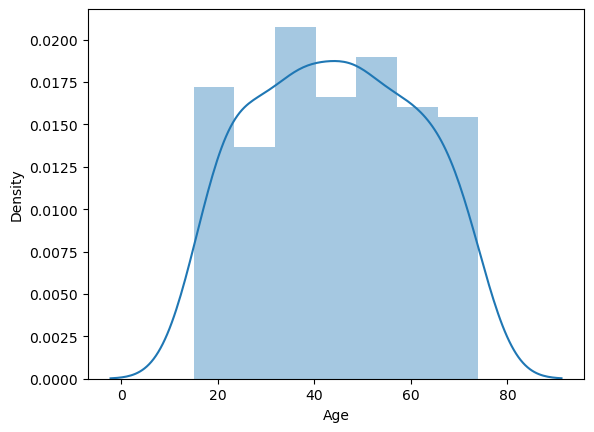

In [20]:
sns.distplot(df_drug['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

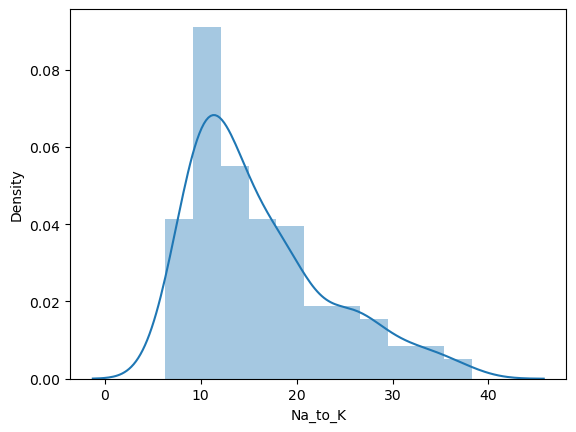

In [21]:
sns.distplot(df_drug['Na_to_K'])

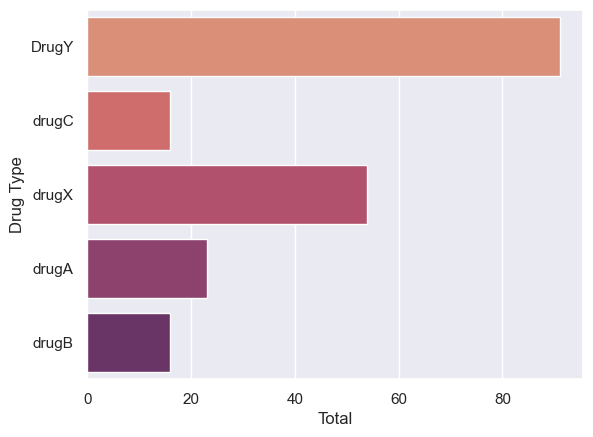

In [22]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df_drug, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

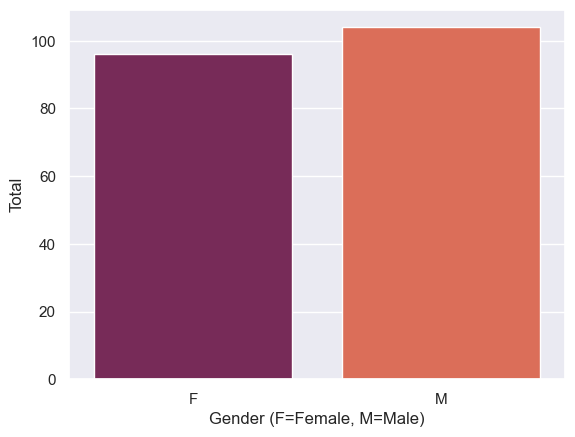

In [23]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df_drug, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

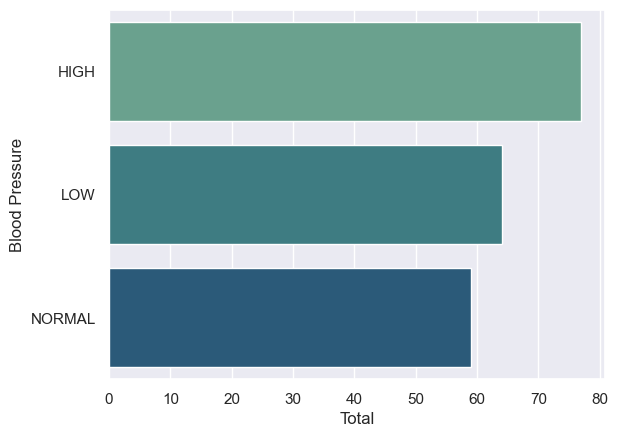

In [24]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df_drug, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

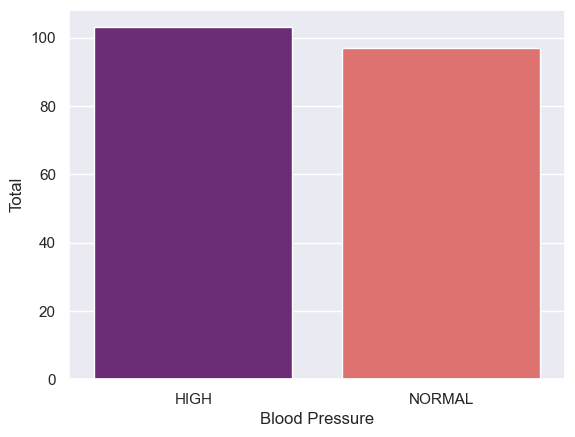

In [25]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df_drug, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

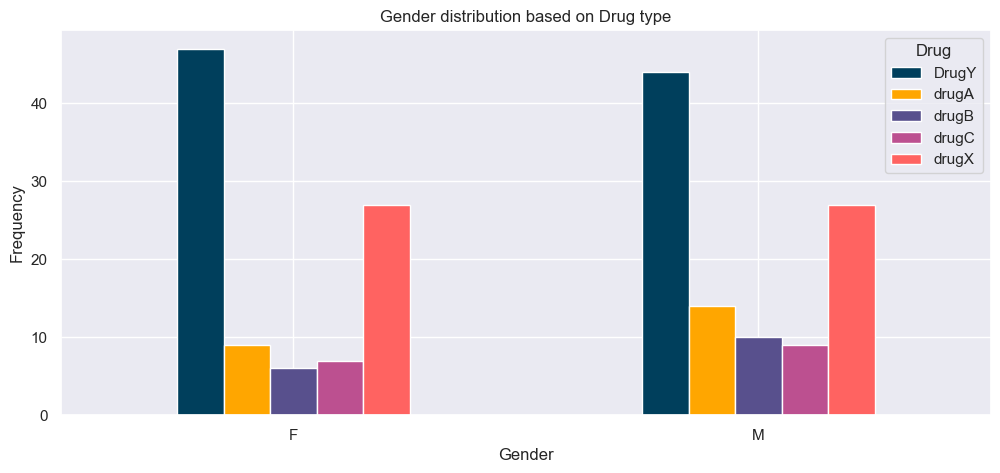

In [26]:
pd.crosstab(df_drug.Sex,df_drug.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

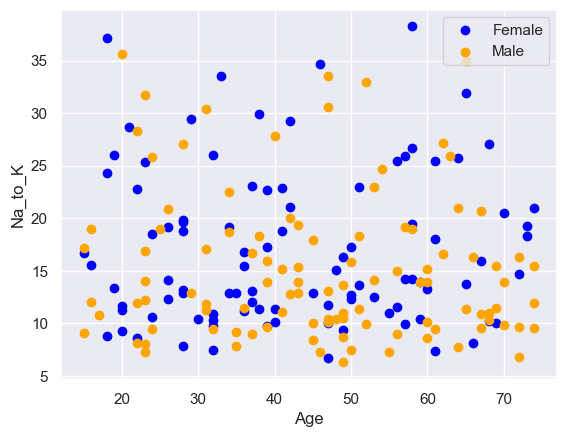

In [27]:
plt.scatter(x=df_drug.Age[df_drug.Sex=='F'], y=df_drug.Na_to_K[(df_drug.Sex=='F')], c="Blue")
plt.scatter(x=df_drug.Age[df_drug.Sex=='M'], y=df_drug.Na_to_K[(df_drug.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

In [28]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df_drug['Age_binned'] = pd.cut(df_drug['Age'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['Age'], axis = 1)

In [29]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df_drug['Na_to_K_binned'] = pd.cut(df_drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df_drug.drop(['Na_to_K'], axis = 1)

In [30]:
X = df_drug.drop(["Drug"], axis=1)
y = df_drug["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [31]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [32]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [33]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


In [34]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

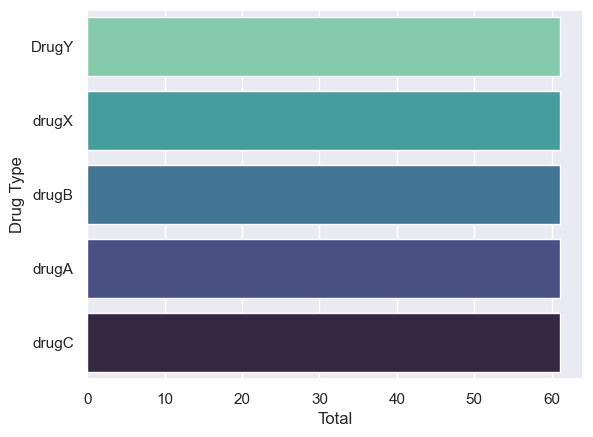

In [35]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df_drug, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Logistic Regression accuracy is: 85.00%
